<a href="https://colab.research.google.com/github/harisapn/TensorFlow-deep-learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Neural Network classification with TensorFlow


In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")


2.15.0
Notebook last run (end-to-end): 2023-12-21 08:30:17.062988


## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
#Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "labels": y})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


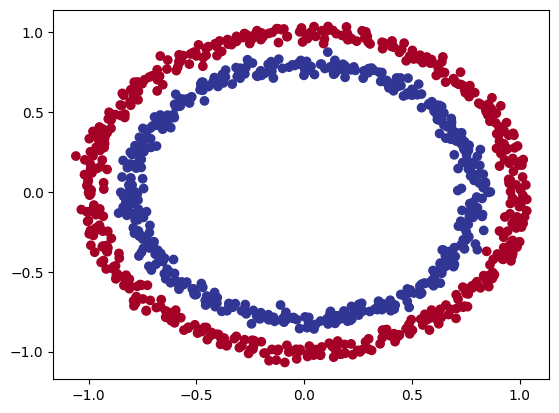

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

##Input and output shapes


In [ ]:
#Check the shapes of our input and output data

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#View first examples

circles.head()

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
X[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

##Steps in modelling


1.   turn data into tensors
2.   buidl a model (input layers, output layers, activation functions, optimizers, losses, metrics)
3. fit the model (number of epochs)
4. evaluate your model



In [ ]:
##Steps in modell

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.0973 - accuracy: 0.4630
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4790
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4810


In [ ]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.0365 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3420 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4930
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5020
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4840
Epoch 11/

### Improving the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.5488 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4590
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4800
Epoch 11/

### Visualize our model's predictions


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
   # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())




313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


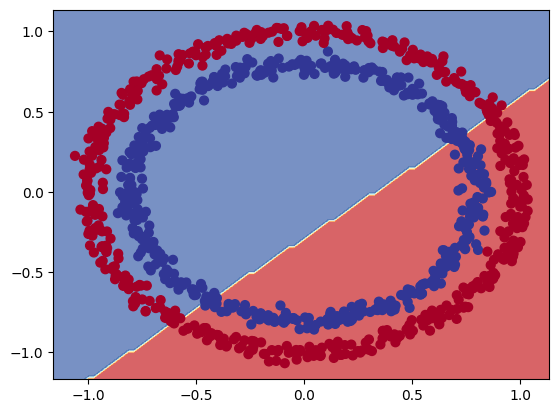

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Adding the activation functions

---



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2599 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1794 - accuracy: 0.4530
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1378 - accuracy: 0.4550
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0960 - accuracy: 0.4550
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0771 - accuracy: 0.4550
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0707 - accuracy: 0.4540
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0658 - accuracy: 0.4550
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0422 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9822 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9310 - accuracy: 0.4520
Epoch 11/

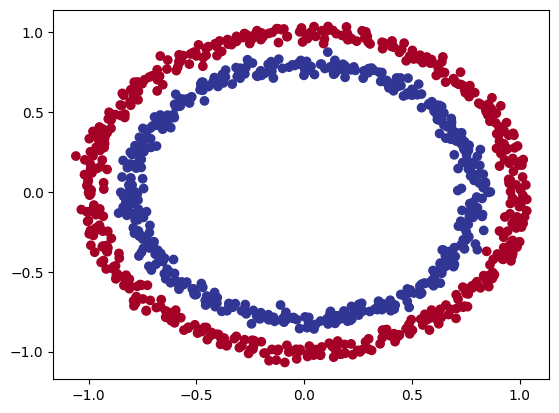

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


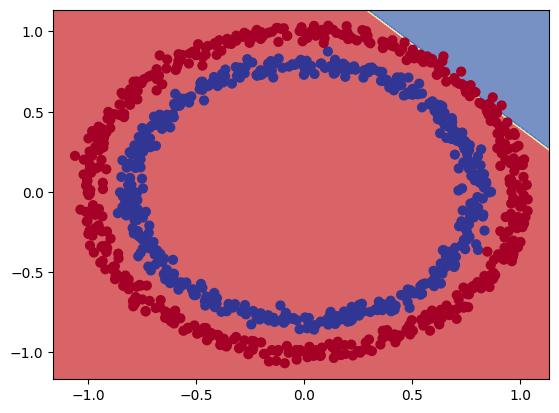

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Adding the non-linearity part to our model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

To get better performance, increase the number of neurons


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.2644 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3991 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2584 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1548 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0723 - accuracy: 0.4350
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0075 - accuracy: 0.4080
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9553 - accuracy: 0.4570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.4680
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


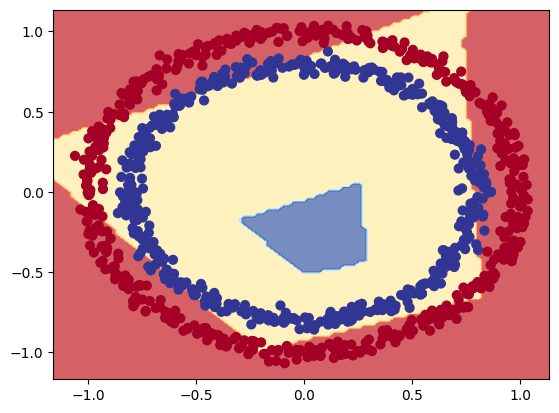

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

change the activation function on our output layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.9010


[0.36264467239379883, 0.9010000228881836]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


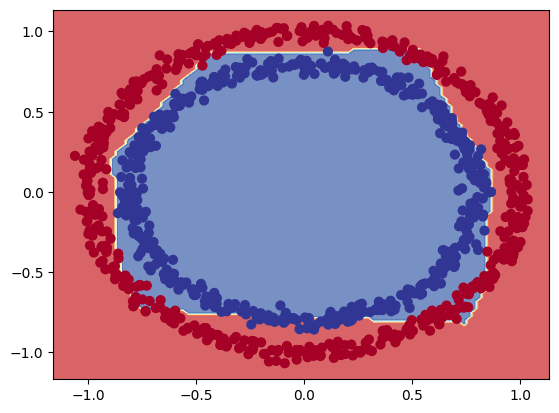

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5337
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5663
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5575
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6237
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6363
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.6625
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7400
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7475
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.8562
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.8675
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")


7/7 [==============================] - 0s 4ms/step - loss: 0.0671 - accuracy: 0.9900
Model loss on the test set: 0.06713756918907166
Model accuracy on the test set: 99.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


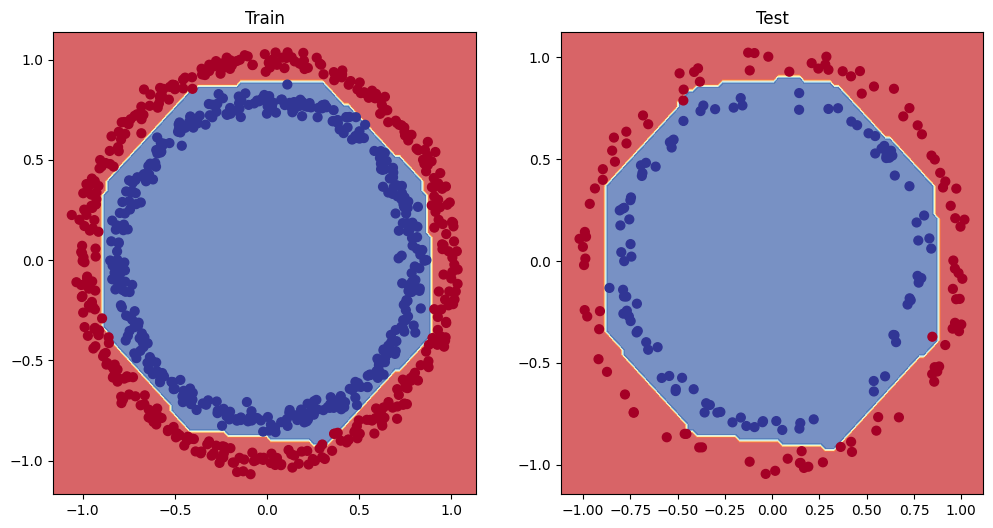

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


Text(0.5, 1.0, 'Model_8 training curves')

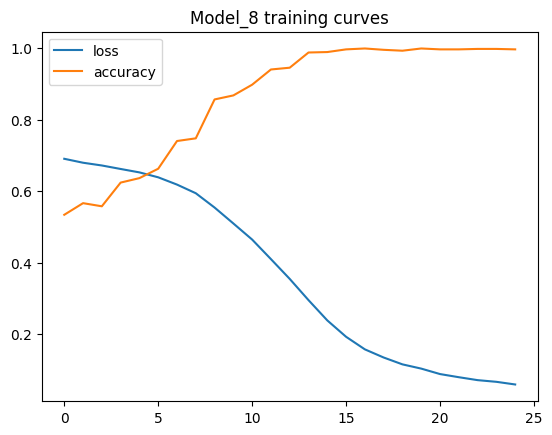

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

finding the best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7207 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7158 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

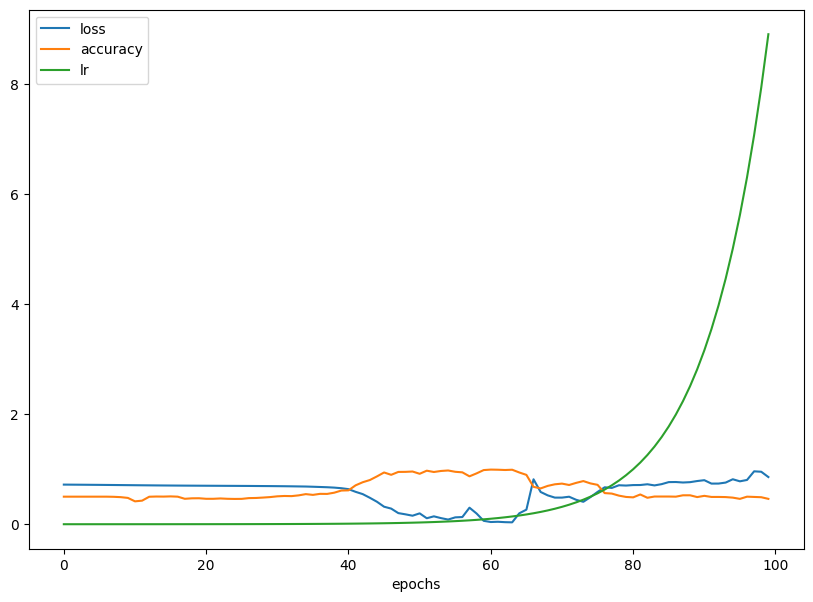

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

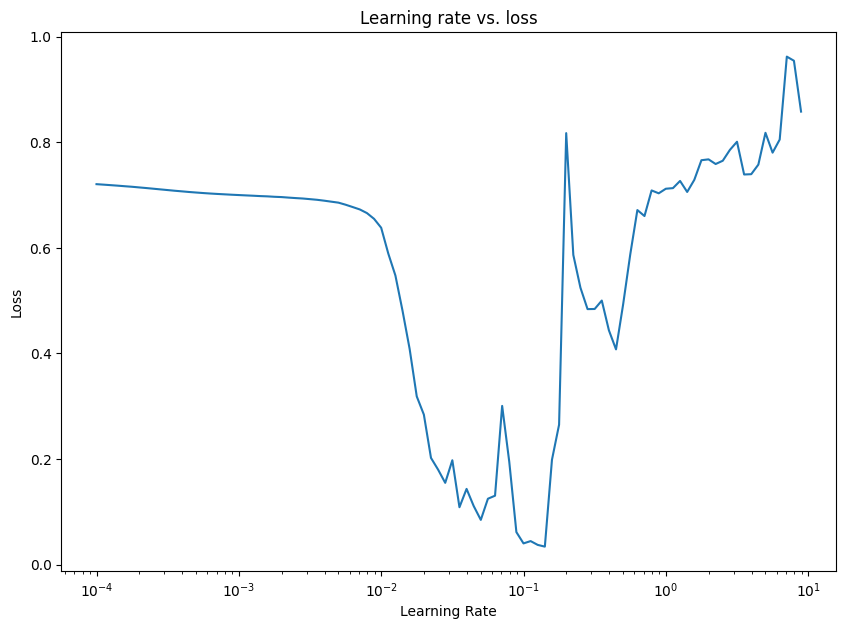

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

 The ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

 Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.4800
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4888
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4850
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4837
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4900
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.4925
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.4938
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5050
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5163
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5150
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6100


[0.6785193681716919, 0.6100000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


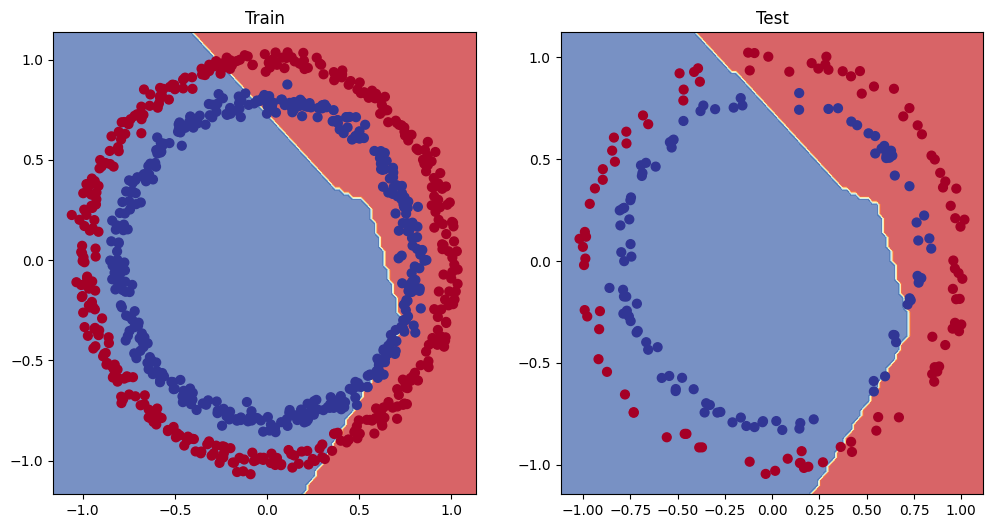

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6100
Model loss on test set: 0.6785193681716919
Model accuracy on test set: 61.00%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_preds

array([[9.95754957e-01],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.53013822e-03],
       [1.71996094e-02],
       [9.95754957e-01],
       [9.24502383e-04],
       [9.95754957e-01],
       [1.68764442e-02],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.85265136e-01],
       [9.95754957e-01],
       [1.16972916e-03],
       [9.95754957e-01],
       [1.36692049e-02],
       [9.95754957e-01],
       [9.95714724e-01],
       [9.95754957e-01],
       [3.08610907e-07],
       [9.94128585e-01],
       [9.95754957e-01],
       [7.89985776e-01],
       [1.56604720e-08],
       [9.95754957e-01],
       [2.10264943e-08],
       [9.95754957e-01],
       [9.95754957e-01],
       [6.99085236e-01],
       [2.33430965e-05],
       [9.95754957e-01],
       [9.95754957e-01],
       [9.90617990e-01],
       [9.95754957e-01],
       [9.95754957e-01],


In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_preds))

array([[54, 47],
       [31, 68]])

In [ ]:
import itertools

figsize=(10,10)

#Create the confusion_matrix

cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
n_classes=cm.shape[0]

In [ ]:
cm.shape[0]


2

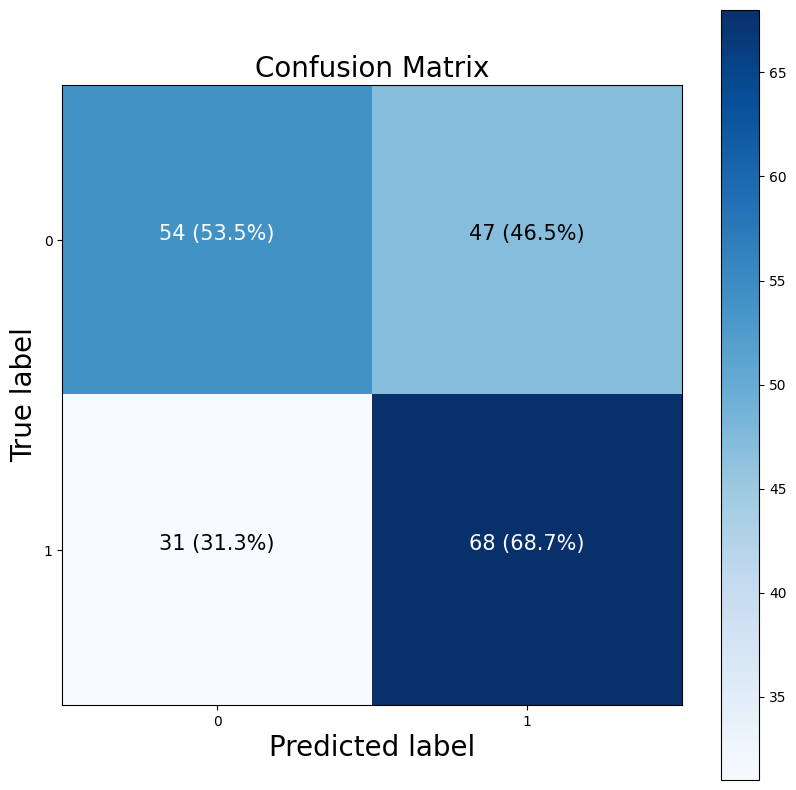

In [ ]:
fig, ax=plt.subplots(figsize=figsize)
#Create a matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes

classes=False

if classes:
  labels=classes

else:
  labels=np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

NameError: ignored

## Working with larger data set - multiclass classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#check the shape
train_data.shape[0], train_labels.shape[0]

(60000, 60000)

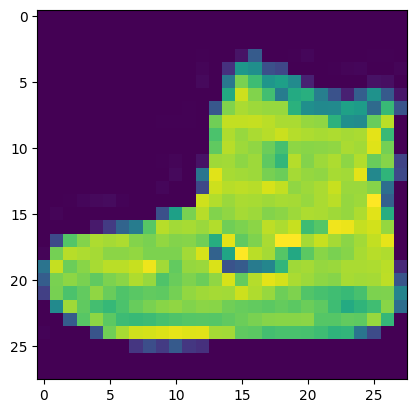

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
#check out samples label
train_labels[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

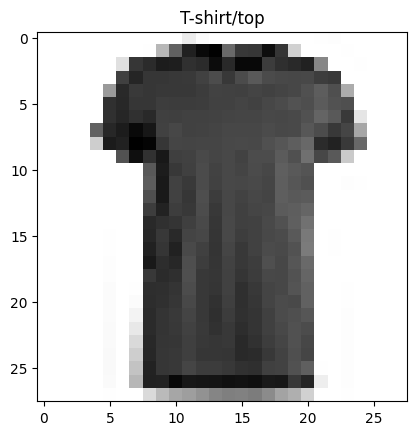

In [ ]:
plt.imshow(train_data[17], cmap=plt.cm.binary) #change to black and white
plt.title(class_names[train_labels[17]]);

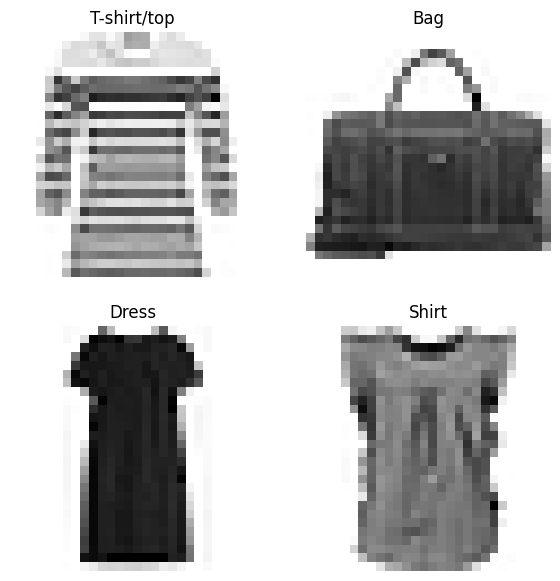

In [ ]:
#plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_multi = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model with the ideal learning rate
model_multi.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_multi.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4909 - accuracy: 0.0995 - val_loss: 2.3023 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2739 - accuracy: 0.1125 - val_loss: 2.2339 - val_accuracy: 0.1317
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2204 - accuracy: 0.1385 - val_loss: 2.1838 - val_accuracy: 0.1528
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0882 - accuracy: 0.1767 - val_loss: 1.8409 - val_accuracy: 0.2388
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7510 - accuracy: 0.2585 - val_loss: 1.6884 - val_accuracy: 0.2811
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6687 - accuracy: 0.2867 - val_loss: 1.6514 - val_accuracy: 0.2840
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6329 - accuracy: 0.2930 - val_loss: 1.6266 - val_accuracy:

In [ ]:
model_multi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_multi1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_multi1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_multi1.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2187 - accuracy: 0.5618 - val_loss: 0.8365 - val_accuracy: 0.7116
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7395 - accuracy: 0.7380 - val_loss: 0.7075 - val_accuracy: 0.7500
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6634 - accuracy: 0.7581 - val_loss: 0.6713 - val_accuracy: 0.7477
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6337 - accuracy: 0.7674 - val_loss: 0.6517 - val_accuracy: 0.7624
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6168 - accuracy: 0.7725 - val_loss: 0.6703 - val_accuracy: 0.7614
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6028 - accuracy: 0.7773 - val_loss: 0.6275 - val_accuracy: 0.7703
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5943 - accuracy: 0.7798 - val_loss: 0.6405 - val_accuracy:

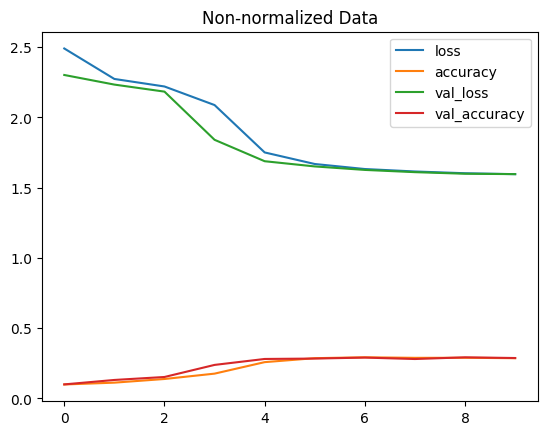

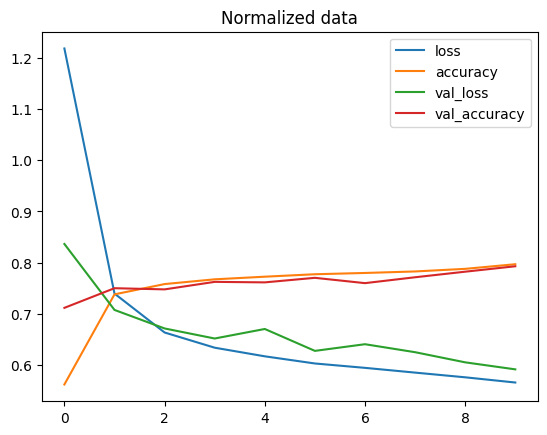

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_multi3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_multi3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_multi3.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 13s 5ms/step - loss: 1.2244 - accuracy: 0.5755 - val_loss: 0.8439 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7262 - accuracy: 0.7501 - val_loss: 0.6814 - val_accuracy: 0.7719 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6354 - accuracy: 0.7793 - val_loss: 0.6481 - val_accuracy: 0.7740 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6004 - accuracy: 0.7902 - val_loss: 0.6186 - val_accuracy: 0.7878 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5860 - accuracy: 0.7940 - val_loss: 0.6093 - val_accuracy: 0.7893 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5751 - accuracy: 0.7974 - val_loss: 0.6287 - val_accuracy: 0.7852 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4

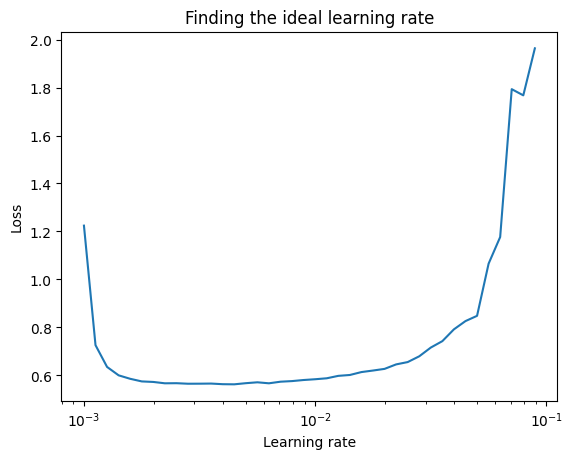

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_multi4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_multi4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=["accuracy"])


# Fit the model
history = model_multi4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0061 - accuracy: 0.6589 - val_loss: 0.7732 - val_accuracy: 0.7341
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7078 - accuracy: 0.7599 - val_loss: 0.7251 - val_accuracy: 0.7424
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6417 - accuracy: 0.7796 - val_loss: 0.6616 - val_accuracy: 0.7670
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6170 - accuracy: 0.7860 - val_loss: 0.6295 - val_accuracy: 0.7853
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6065 - accuracy: 0.7887 - val_loss: 0.6340 - val_accuracy: 0.7783
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5975 - accuracy: 0.7917 - val_loss: 0.6292 - val_accuracy: 0.7878
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5929 - accuracy: 0.7921 - val_loss: 0.6471 - val_accuracy:

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_multi4.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.73615400e-10, 2.25777771e-10, 1.77700121e-09, 4.58356270e-10,
        7.73981323e-10, 4.44669425e-01, 9.22719401e-10, 3.23081352e-02,
        4.15675895e-04, 5.22606730e-01],
       [2.63531206e-06, 3.59431425e-13, 9.65646088e-01, 1.90121086e-10,
        7.90638942e-03, 4.94584517e-13, 1.07230637e-02, 1.64271999e-37,
        1.57216936e-02, 4.04148037e-36],
       [5.53813530e-04, 9.73390460e-01, 5.36607637e-04, 1.97939277e-02,
        6.63755927e-04, 4.15726751e-03, 2.71422992e-04, 2.22595903e-04,
        1.94151144e-05, 3.90687754e-04],
       [5.53813530e-04, 9.73390460e-01, 5.36607637e-04, 1.97939277e-02,
        6.63755927e-04, 4.15726751e-03, 2.71422992e-04, 2.22595903e-04,
        1.94151144e-05, 3.90687754e-04],
       [7.25297406e-02, 6.33067975e-05, 5.10897040e-01, 9.34443530e-03,
        5.06642796e-02, 2.28737667e-06, 3.43214691e-01, 4.23647076e-16,
        1.32841095e-02, 7.79113313e-18]], dtype=float32)

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[711,   3,  21, 111,   6,   2, 117,   1,  28,   0],
       [  1, 939,  10,  38,   6,   4,   0,   1,   1,   0],
       [ 12,   7, 730,  12, 148,   1,  41,   0,  49,   0],
       [ 40,  50,  32, 771,  45,   6,  48,   3,   5,   0],
       [  1,   6, 199,  22, 738,   0,  28,   0,   6,   0],
       [  0,   0,   0,   2,   0, 877,   0,  57,   8,  56],
       [120,   5, 221,  70, 167,   2, 374,   4,  37,   0],
       [  0,   0,   0,   0,   0,  47,   0, 895,   0,  58],
       [  9,   1,  14,   7,   1,  31,  10,   5, 922,   0],
       [  0,   0,   0,   0,   0,  32,   0,  34,   1, 933]])

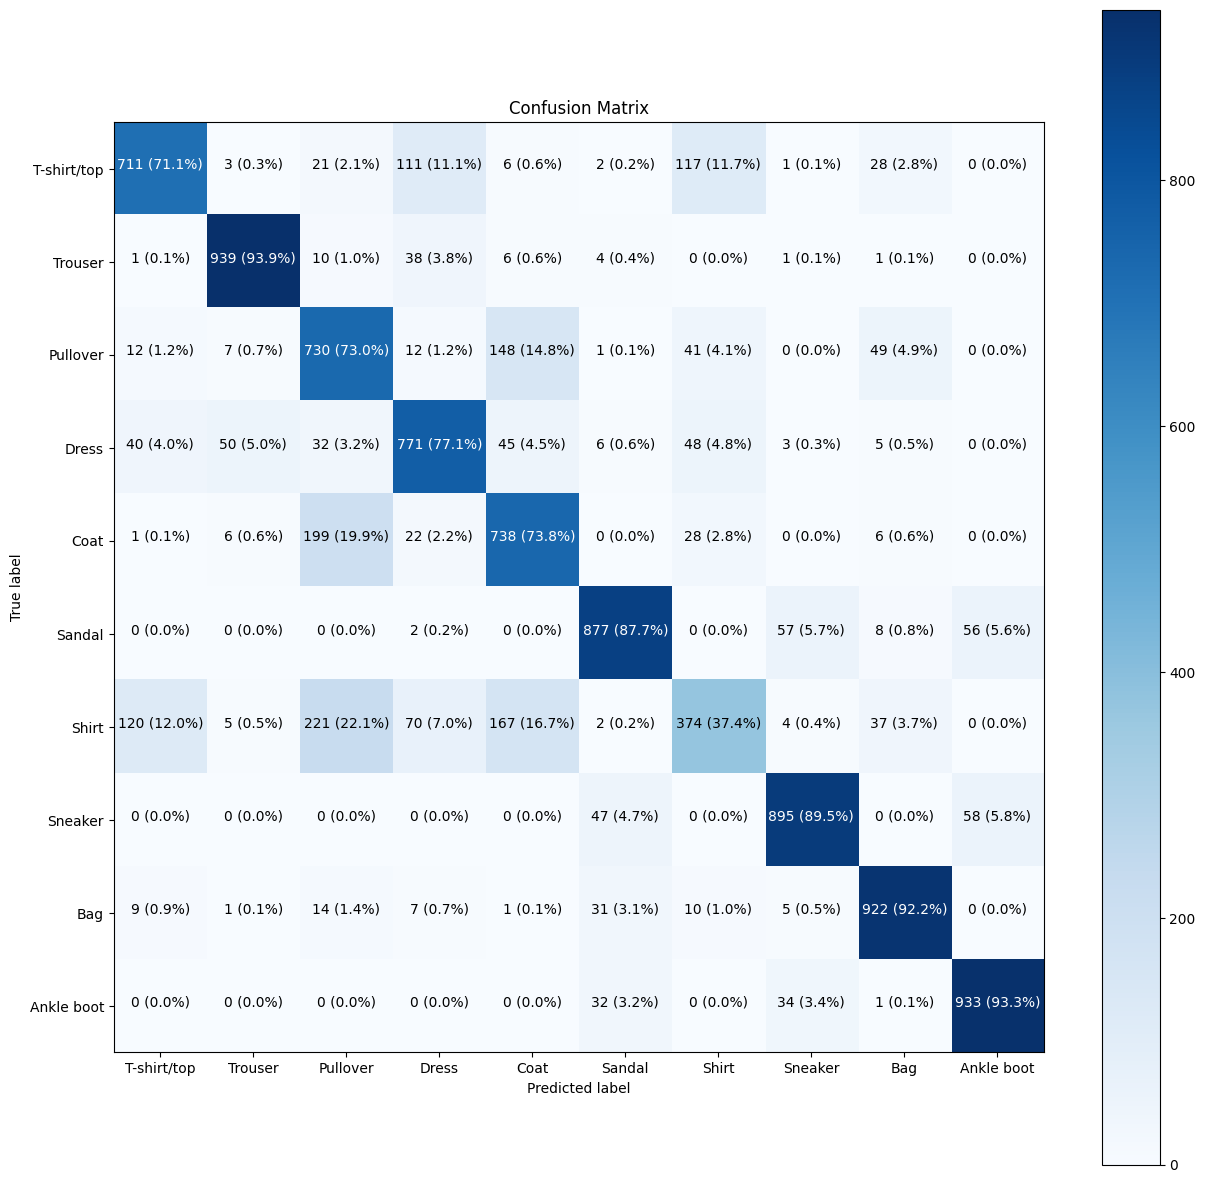

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 29ms/step


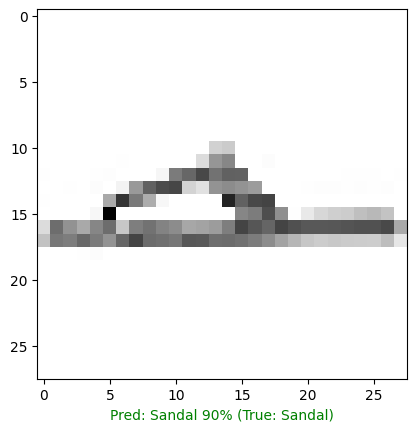

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_multi4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
# Find the layers of our most recent model
model_multi4.layers

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_multi4.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-1.2907639 ,  1.1431216 , -0.07671593, -1.2029037 ],
        [-0.32537264, -0.32116067,  0.00228013, -0.6712219 ],
        [-0.88485193,  1.7894728 ,  0.0089049 , -1.6248862 ],
        ...,
        [-0.28551108,  0.9199415 , -0.021613  ,  0.84289104],
        [-1.7016833 ,  0.2640162 ,  0.01096435,  0.7559317 ],
        [-0.42714646,  0.7608222 , -0.06220077, -0.7572444 ]],
       dtype=float32),
 (784, 4))

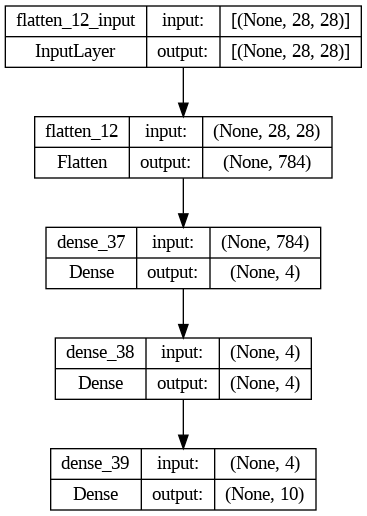

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_multi4, show_shapes=True)